<div style="text-align: center; font-family: Arial, sans-serif; margin-top: 50px;">
<h1 style="font-size: 36px; font-weight: bold; color: #4CAF50;">Mini-projet 2 - Équation de Newton</h1>
<h2 style="font-size: 20px; font-weight: bold; color: #4CAF50;">PHS3903</h2>
<h2 style="font-size: 20px; margin-bottom: 20px;"> Marie-Lou Dessureault, Elliott Menu, Tendano Yehama Bantia Luther</h2> 
<h2 style="font-size: 16px; margin-bottom: 10px;">2211129, 2147422, 2141649 </h2>
<h2 style="font-size: 16px; margin-bottom: 10px;">31 janvier 2025</h2>
<h2 style="font-size: 16px; margin-bottom: 10px;">Shawn Molesky, Maksim Skorobogatiy, Jérémie Villeneuve</h2>
</div>


## 1 – Définir la méthode numérique
En utilisant un maillage avec un pas de temps ∆t uniforme :
$$
t_n = n∆t, n = 0, 1, . . . 
$$
ainsi qu’une formule de différences finies centrée à trois points pour la dérivée seconde et une
formule centrée à deux points pour la dérivée première :


(a) [6 pts] Montrer qu’on obtient la méthode d’Euler explicite suivante :
$$
θ_1 = θ_0 + (1 − \frac{β∆t}{2})ω_0∆t − (\frac{g}{2L}∆t^2)sin(θ_0)
$$
$$
θ_{n+1} = \frac{4θ_n − (2 − β∆t)θ_{n−1} − (\frac{g}{L}∆t^2)sin(θ_n)}{2 + β∆t}, \ \  n = 1, 2, . . . 
$$
et spécifier son ordre de convergence.

Réponse (a) :

On étudie ici le mouvement d'un pendule simple amorti, de masse $m$ et de longueur $L$, 
régi par l'équation différentielle  
$$
\frac{d^2\theta}{dt^2} \;+\; \beta \,\frac{d\theta}{dt} 
\;+\; \frac{g}{L}\,\sin(\theta) 
\;=\; 0,
\quad (1)
$$
avec les conditions initiales  

$$
\theta(0) \;=\; \theta_0,
\quad
\frac{d\theta}{dt}(0) \;=\; \omega_0.
\quad (2)
$$


On discrétise le temps en pas $\Delta t$ :

$$
t_n \;=\; n\,\Delta t,\quad n = 0,1,2,\dots
$$
On approxime la dérivée seconde par la différence centrée à trois points :

$$
\frac{d^2\theta}{dt^2}(t_n)
\;\approx\;
\frac{\theta_{n+1} \;-\; 2\,\theta_n \;+\; \theta_{n-1}}{(\Delta t)^2}.
$$

Le terme d'amortissement 
$$
\beta\,\tfrac{d\theta}{dt}(t_n)
$$
est approché par la différence centrée à deux points :
$$
\beta\,\frac{d\theta}{dt}(t_n)
\;\approx\;
\beta\,\frac{\theta_{n+1}-\theta_{n-1}}{2\,\Delta t}.
$$
Enfin, le terme 
$$
\tfrac{g}{L}\,\sin(\theta)
$$
est évalué en $\theta_n$. 

En insérant ces approximations dans l'équation~\eqref{eq:ODE}, on obtient :
$$
\frac{\theta_{n+1} - 2\,\theta_n + \theta_{n-1}}{(\Delta t)^2}
\;+\;
\beta\,\frac{\theta_{n+1} - \theta_{n-1}}{2\,\Delta t}
\;+\;
\frac{g}{L}\,\sin(\theta_n)
\;=\; 0.
$$
On regroupe alors les termes en $\theta_{n+1}$ pour isoler cette inconnue. Après simplifications, on arrive à
$$
\theta_{n+1}
\;=\;
\frac{\,4\,\theta_n 
 - \bigl(2 - \beta\,\Delta t\bigr)\,\theta_{n-1}
 - 2\,\frac{g}{L}\,(\Delta t)^2\,\sin(\theta_n)\,}
     {\,2+\beta\,\Delta t\,},
\quad (3)
$$

---

#### Calcul de $\theta_{1}$

Pour initialiser la récurrence, nous avons besoin de $\theta_0$ (imposé par \(2\)) et de $\theta_1$.  La formule à trois points fait référence à $\theta_{-1}$, valeur que l'on ne possède pas.  

On l'écrit a partir d'un développement de Taylor :
$$
\theta_{-1}
\;\approx\;
\theta_0 \;-\;\Delta t\,\omega_0
\quad
(\text{puisque } \dot{\theta}(0)=\omega_0).
$$
En injectant $\theta_{-1}$ dans l'équation aux différences centrées, on trouve :

$$
\theta_1
\;=\;
\theta_0
\;+\;
\Bigl(1-\frac{\beta\,\Delta t}{2}\Bigr)\,\omega_0\,\Delta t
\;-\;
\frac{g}{2\,L}\,(\Delta t)^2\,\sin\bigl(\theta_0\bigr),
\quad (4)
$$

#### Ordre de convergence


## Ordre de convergence : un schéma d’ordre 1 en temps

Le schéma obtenu d’Euler explicite, avec différences finies pour $\theta$  possède un **ordre de convergence égal à 1**. En effet, en vertu du théorème de Lax (ou de l’équivalence “consistance + stabilité = convergence” dans le cas ODE) :

1. **La consistance** :  
   L’erreur locale, évaluée en insérant la solution exacte dans la formule de récurrence, s’avère $\mathcal{O}\bigl((\Delta t)^2\bigr)$.  
2. **La stabilité** :  
   Tant que $\Delta t$ est assez petit pour satisfaire la condition de stabilité, l’erreur ne diverge pas.  
3. **La convergence globale** :  
   Du fait du caractère *explicite* et de la présence du terme $\beta$,$\theta$, les erreurs locales $\mathcal{O}\bigl((\Delta t)^2\bigr)$ s’additionnent sur $\tfrac{T}{\Delta t}$ pas. Le résultat final est donc une erreur d’ordre $\mathcal{O}\bigl(\Delta t\bigr)$.


## 2 – Choisir un pas de temps adéquat d’un point de vue physique
Il est important que le pas choisi permette de bien représenter les phénomènes physiques à simuler.


(b) [2 pts] Déterminer la ou les échelles de temps associées au mouvement du pendule en fonction
des paramètres du problème, puis expliquer comment le pas ∆t devrait être choisi pour que
la simulation puisse décrire adéquatement la situation étudiée.



Pour un **pendule simple amorti**, on peut distinguer principalement **deux échelles de temps** :

1. **L’échelle d’oscillation sans amortissement** : 
   $$
   T_0 = 2\pi \,\sqrt{\frac{L}{g}},
   $$
   qui correspond à la **période** du pendule **non amorti** , cette échelle caractérise la **durée d’une oscillation**.

2. **L’échelle d’amortissement** :  
   $$
   \tau_d = \frac{1}{\beta},
   $$
   qui est le **temps caractéristique** pour que la dissipation $\beta$ fasse décroître l’oscillation.

---

### Choix du pas $\Delta t$


## 1\. Équation du pendule amorti

On considere l’équation différentielle :

$$
\frac{d^2\theta}{dt^2}
\;+\;
\beta \,\frac{d\theta}{dt}
\;+\;
\frac{g}{L}\,\sin\theta
\;=\;
0,
\quad (1)
$$

où :
- $\theta(t)$ est l’angle de déviation par rapport à la verticale,
- $\beta$ est la constante d’amortissement,
- $\frac{g}{L}$ est la fréquence au carré.

---

## 2\. Linéarisation : $\sin \theta \approx \theta$

Pour **petits angles**, on pose $\sin\theta \approx \theta$. L’équation devient :

$$
\frac{d^2\theta}{dt^2}
\;+\;
\beta\,\frac{d\theta}{dt}
\;+\;
\omega_0^2\,\theta
\;=\;0,
\quad
\text{où}
\quad
\omega_0^2 \;=\;\frac{g}{L}.
$$

C’est donc un **oscillateur amorti linéaire**.

---

## 3\. Mise en forme “système du 1er ordre”

Pour appliquer un schéma explicite, on récrit l’ODE du 2e ordre en un **système**. Posons :

$$
x_1(t) \;=\; \theta(t),
\qquad
x_2(t) \;=\; \dot{\theta}(t).
$$

On obtient :

$$
\begin{cases}
x_1'(t) \;=\; x_2(t),\\[6pt]
x_2'(t) \;=\; -\,\beta\,x_2(t)\;-\;\omega_0^2\,x_1(t).
\end{cases}
$$

---

## 4\. Schéma d’Euler explicite en temps

On définit un pas de temps $\Delta t$, et on note $\t_n$ = n, $\Delta t$. La méthode d’Euler explicite s’écrit :

$$
\mathbf{x}_{n+1}
\;=\;
\mathbf{x}_n
\;+\;
\Delta t\, A\, \mathbf{x}_n,
$$

où

$$
\mathbf{x} =
\begin{pmatrix}
x_1 \\[3pt]
x_2
\end{pmatrix},
\qquad
A =
\begin{pmatrix}
0 & 1\\[3pt]
-\omega_0^2 & -\beta
\end{pmatrix}.
$$

En forme développée  le **schéma d’Euler explicite** se traduit par :

$$
\begin{cases}
x_{1,n+1} = x_{1,n} + \Delta t\,x_{2,n},\\[6pt]
x_{2,n+1} = x_{2,n} - \Delta t\,(\beta\,x_{2,n} + \omega_0^2\,x_{1,n}).
\end{cases}
$$

On peut rassembler le tout dans la matrice

$$
M \;=\; I + \Delta t\, A \;=\;
\begin{pmatrix}
1 & \Delta t\\[3pt]
-\omega_0^2\,\Delta t & 1 - \beta\,\Delta t
\end{pmatrix}.
$$

---

## 5\. Analyse de stabilité : $\mathbf{x}_n = \lambda^n \mathbf{v}$

Pour étudier la **stabilité**, on cherche une solution de la forme $\mathbf{x}_n = \lambda^n\,\mathbf{v}$. En substituant dans $\mathbf{x}_{n+1} = M\,\mathbf{x}_n$ :

$$
\lambda^{n+1}\,\mathbf{v}
\;=\;
M\bigl(\lambda^n\,\mathbf{v}\bigr)
\;=\;
\lambda^n\,\bigl(M\,\mathbf{v}\bigr).
$$

D’où :

$$
\lambda\,\mathbf{v}
\;=\;
M\,\mathbf{v},
$$

ce qui signifie que \(\lambda\) est **valeur propre** de \(M\). La **condition de stabilité** exige :

$$
|\lambda| \;<\; 1
\quad
\text{pour toutes les valeurs propres de } M.
$$

---

## 6\. Calcul des valeurs propres et critère de stabilité

La matrice \(M\) est :

$$
M =
\begin{pmatrix}
1 & \Delta t\\[3pt]
-\omega_0^2\,\Delta t & 1 - \beta\,\Delta t
\end{pmatrix}.
$$

Les valeurs propres $\lambda$ satisfont $\det(M - \lambda I)$ = 0. Explicitement :

$$
(1-\lambda)\,\bigl((1 - \beta\,\Delta t) - \lambda\bigr)
\;+\;
\omega_0^2 (\Delta t)^2
\;=\;0.
$$

En développant, on obtient un **polynôme du 2e degré** :

$$
\lambda^2
\;-\;
\bigl(2 - \beta\,\Delta t\bigr)\,\lambda
\;+\;
\Bigl(1 - \beta\,\Delta t + \omega_0^2\,(\Delta t)^2\Bigr)
\;=\;0.
$$

Pour que toutes ses racines $\lambda$ vérifient $\vert \lambda \vert$ < 1, il faut imposer

$$
\Delta t
\;<\;
\min\!\Bigl(\frac{2}{\omega_0},\;\frac{2}{\beta}\Bigr)
\quad
\text{avec}
\quad
\omega_0 = \sqrt{\frac{g}{L}}.
$$

---

## 7\. Conclusion

Sous l’hypothèse $\sin \theta \approx \theta$, le **schéma d’Euler explicite** ne reste stable que si

$$
\boxed{
\Delta t
\;<\;
\min\!\bigl(\tfrac{2}{\omega_0},\,\tfrac{2}{\beta}\bigr).
}
$$




Réponse (b)

(c) [2 pts] Expliquer ce qui se passerait si vous choisissiez un pas de temps légèrement supérieur
et largement supérieur à la valeur de stabilité déterminée.

Réponse (c)

- Pour $\Delta t$ *légèrement supérieur* à $\Delta t_{\text{stab}}$ :  
  On observe souvent des oscillations parasites dont l’amplitude peut croître lentement, ou une dérive lente qui finit par dégrader la solution. L’erreur ne va pas nécessairement exploser de façon immédiate, mais il peut y avoir des oscillations erratiques qui se développent. La solution perd en réalisme et se décale progressivement de la solution physique attendue.

- Pour $\Delta t$ *largement supérieur* à $\Delta t_{\text{stab}}$ :  
  Le schéma devient clairement *instable* ; la solution peut  exploser ou osciller de façon totalement aberrante (valeurs extrêmes, puis NaN, etc.). complètement non physiques. On dit que la méthode diverge le schéma ne parvient pas à suivre la dynamique et accumule d’énormes erreurs, rendant toute simulation impossible ou absurde..

## 3 – Implémenter la méthode numérique
Modifier le code fourni afin d’implémenter la méthode numérique (5)–(6), puis répondre aux questions suivantes pour le cas spécifique : g = 9,81 $m/s^2$, m = 1,0 kg, L = 100 cm, β = 0,1 $s^{−1}$, $\theta_0$ = $\pi$/6 rad et $\omega_0$ = 5 rad/s.

(d) [2 pts] Choisir une valeur de pas de temps $\Delta t = \Delta t_0$ appropriée, puis tracer un graphique
de $\theta(t)$ en fonction de $t$ pour ce pas de temps.

Réponse (d):

Le pas de temps $\Delta t_0$ a été choisi selon la condition déterminée au (b), soit $\Delta t_0=0.2$ s.


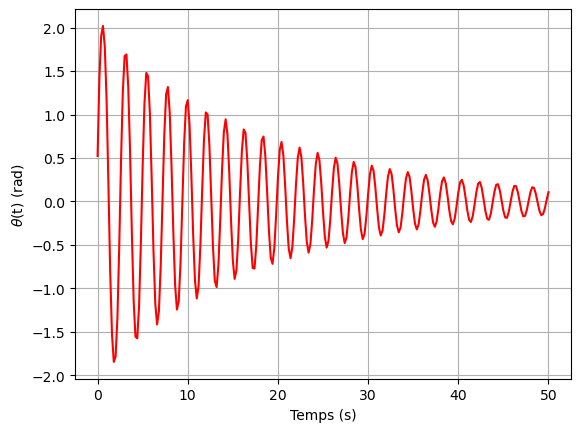

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres physiques du problème
g = 9.81     # Champ gravitationnel (m²/s)
m = 1.000    # Masse du pendule (kg)
L = 1.000    # Longueur du câble (m)
beta = 0.1   # Constante d'amortissement (1/s)

# Conditions initiales
theta0 = np.pi/6        # Position initiale (rad)
omega0 = 5              # Vitesse inititale (rad/s)

# Paramètres généraux de simulation
tf = 50              # Temps final (s)
dt0 = 0.2      # Pas de temps le plus élevé (s)
N = tf/dt0            # Nombre d'itérations (conseil : s'assurer que dt soit un multiple entier de tf)

# Initialisation
t = np.arange(0, tf + dt0, dt0)  # Vecteur des valeurs t_n
theta = np.zeros(int(N + 1))  # Vecteur des valeurs theta_n
theta[0] = theta0
theta[1] = theta0 + (1 - (beta * dt0) / 2) * omega0 * dt0 - (g / (2 * L) * (dt0 ** 2)) * np.sin(theta0) 

# Exécution
for n in range(2, int(N + 1)):
    theta[n] = (4 * theta[n-1] - (2 - beta * dt0) * theta[n-2] - ((2 * g) / L * (dt0 ** 2)) * np.sin(theta[n-1])) / (2 + beta * dt0)

plt.plot(t, theta, color='red')
plt.xlabel('Temps (s)')
plt.ylabel(r'$\theta$(t) (rad)')
plt.grid()
plt.show()

(e) [2 pts] Calculer la position finale du pendule au temps $t_f$ = 10 s pour chacun des pas de
temps suivants :
$$
\Delta t ∈ \{\Delta t_0, \frac{\Delta t_0}{2}, \frac{\Delta t_0}{4}, \frac{\Delta t_0}{8}, \frac{\Delta t_0}{16} \}
$$
Présenter vos résultats à l’aide d’un tableau.

Réponse (e):
<table border="1" width="75%" align="center">
    <caption>Tableau 1: Position finale du pendule au temps t<sub>f</sub> = 10 s pour certains pas de temps &Delta;t</caption>
    <tr>
        <td> &Delta;t (s)</td>
        <th> &Delta;t<sub>0</sub></th>
        <th> &Delta;t<sub>0</sub> / 2</th>
        <th> &Delta;t<sub>0</sub> / 4</th>
        <th> &Delta;t<sub>0</sub> / 8</th>
        <th> &Delta;t<sub>0</sub> / 16</th>
    </tr>
    <tr>
        <td>Position finale (rad) </sub></td>
        <td>1.1660637</td>
        <td>1.09566444</td>
        <td>1.07930468</td>
        <td>1.07534759</td>
        <td>1.07436713</td>  
    </tr>
</table>

In [68]:
# Boucle sur le nombre de simulations                                      
dt_val = [dt0, dt0/2, dt0/4, dt0/8, dt0/16]         # Vecteur des pas de temps pour chaque simulation
K = len(dt_val)                                     # Nombre de simulations
thetaf = np.zeros(K)                                # Vecteur des positions finales pour chaque simulation
tf_2 = 10                                           # Temps final (s)

for k in range(0,K):
# Paramètres spécifiques de la simulation
    dt = dt_val[k]               # Pas de temps de la simulation
    N = tf_2/dt                  # Nombre d'itérations (conseil : s'assurer que dt soit un multiple entier de tf)

# Initialisation
    t = np.arange(0, tf_2 + dt, dt)  # Vecteur des valeurs t_n
    theta = np.zeros(int(N + 1))     # Vecteur des valeurs theta_n
    theta[0] = theta0
    theta[1] = theta0 + (1 - (beta * dt) / 2) * omega0 * dt - (g / (2 * L) * (dt ** 2)) * np.sin(theta0) 

# Exécution
    for n in range(2, int(N + 1)):
        theta[n] = (4 * theta[n-1] - (2 - beta * dt) * theta[n-2] - ((2 * g) / L * (dt ** 2)) * np.sin(theta[n-1])) / (2 + beta * dt)

    thetaf[k] = theta[-1]  # Position au temps final tf

print(thetaf)

[1.1660637  1.09566444 1.07930468 1.07534759 1.07436713]


## 4 – Analyser le comportement de l’erreur (convergence)
Le calcul numérique de l’ordre de convergence est une manière de montrer que la méthode a été
programmée correctement, ce qui ajoute de la crédibilité aux résultats produits.

(f) [4 pts] À l’aide des résultats calculés en (c), tracer un graphique de l’erreur $E$ sur la position
finale du lien en fonction du pas de temps $\Delta t$, en utilisant des échelles appropriées pour les
axes et discutez de ce choix.
Rappel. Une méthode numérique est d’ordre $p$ si l’erreur se comporte comme :
$$
E = O(\Delta t^p).
$$
L’erreur exacte ne pouvant pas être calculèe, on utilise la définition suivante de l’erreur :
$$
E(\Delta t) = |\theta(t_f ; \Delta t) − \theta (t_f ; \frac{\Delta t}{2}) |,
$$
qui consiste à calculer la différence absolue entre les résultats de deux simulations avec un
pas $\Delta t$ et un pas $\Delta t/2$.

Réponse (f) :

[]

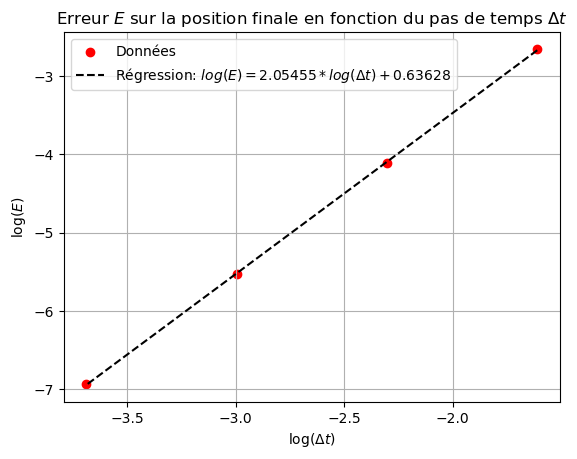

In [69]:
from scipy import stats

E_t = np.zeros(K-1)
log_deltat = np.log(dt_val[0:4])

for n in range(0, K-1):
    E_t[n] = np.abs(thetaf[n]-thetaf[n+1])

log_E_t = np.log(E_t)

reg = stats.linregress(log_deltat, log_E_t)
m = reg.slope
b = reg.intercept

plt.scatter(log_deltat, log_E_t, color='red', label="Données")
plt.plot(log_deltat,(log_deltat * m) + b, "--", label = r"Régression: $log(E)=2.05455*log(\Delta t)+0.63628$", color= "black")
plt.xlabel(r'log($\Delta t$)')
plt.ylabel(r'log($E$)')
plt.title(r'Erreur $E$ sur la position finale en fonction du pas de temps $\Delta t$')
plt.grid()
plt.legend()
plt.plot()

(g) [1 pts] Calculer l’ordre de la méthode à partir du graphique produit.

Réponse (g) :

(h) [1 pts] Déterminer l’effet du pas de temps $\Delta t_0$ choisi sur l’ordre que vous avez calculé.

Réponse (h) :